In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('../data/df_clean_nonulls.csv', index_col=0)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major,company_size,company_type,last_new_job,training_hours,exp_range,target
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,missing,missing,1,36,>20,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,50-99,private_limited,>4,47,11-15,0.0
2,11561,city_21,0.624,missing,0,full_time,Graduate,STEM,missing,missing,never,83,2-5,0.0
3,33241,city_115,0.789,missing,0,missing,Graduate,Business Degree,missing,private_limited,never,52,<=1,1.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,50-99,startup_funded,4,8,>20,0.0


In [42]:
df.shape

(21287, 14)

In [43]:
# Number of NAs in each column

perc_na = round(df.isna().sum() * 100 / len(df), 2)

df_na = pd.DataFrame({'Total NA':df.isna().sum(), 'DType':df.dtypes, '% NA':perc_na})
df_na

,Total NA,DType,% NA
enrollee_id,0,int64,0.0
city,0,object,0.0
city_development_index,0,float64,0.0
gender,0,object,0.0
relevent_experience,0,int64,0.0
enrolled_university,0,object,0.0
education_level,0,object,0.0
major,0,object,0.0
company_size,0,object,0.0
company_type,0,object,0.0


# I. Numeric Columns

In [44]:
num_cols = ['city_development_index', 'relevent_experience', 'training_hours', 'target']

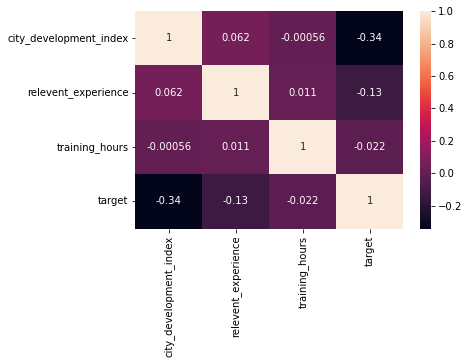

In [45]:
# Make a heatmap

plt.figure()
sns.heatmap(df[num_cols].corr(), annot=True);

City development index seems to have a fairly strong relationship with the target variable.

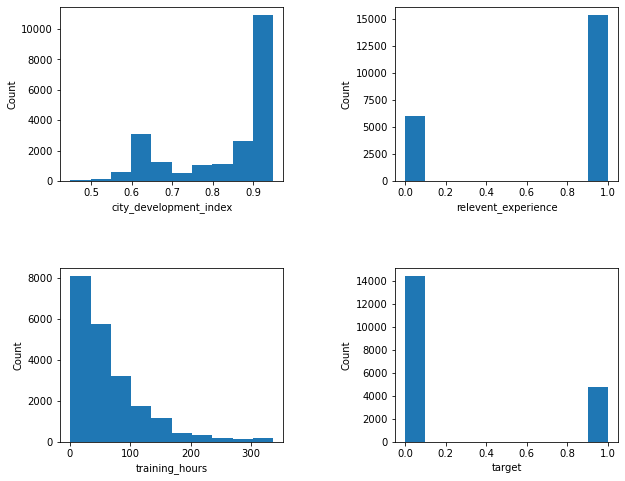

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(num_cols):
    ax = axes.flatten()[i]
    ax.hist(x=col, data=df)
    ax.set(xlabel=col, ylabel='Count')

# II. Categorical Columns

In [49]:
cat_cols = ['gender', 'enrolled_university', 'education_level', 'major', 'company_size',
            'company_type', 'last_new_job', 'exp_range']

In [56]:
# For reindexing ordinal cols

enroll = ['no_enrollment', 'part_time', 'full_time', 'missing']
ed_level = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', 'missing']
exp_lv = ['<=1','2-5','6-10','11-15','16-20','>20', 'missing']
comp_sz = ['<10','10-49','50-99','100-499','500-999','1000-4999','5000-9999','10000+', 'missing']
last_job = ['never','1','2','3','4', '>4', 'missing']
job_type = ['private_limited','startup_funded','startup_earlystage','public_sector','NGO','Other','missing']

In [51]:
def target_bar(ax, x, y, df, reindex=None):
    """Plot bar graphs that compare different levels of a
    column to different levels of a target"""
    if reindex:
        df_plot = df.groupby([x, y]).size().reset_index().pivot(columns=y, index=x, values=0).reindex(reindex)
    else:
        df_plot = df.groupby([x, y]).size().reset_index().pivot(columns=y, index=x, values=0)
    df_plot.plot(kind='bar', rot=45, ax=ax)

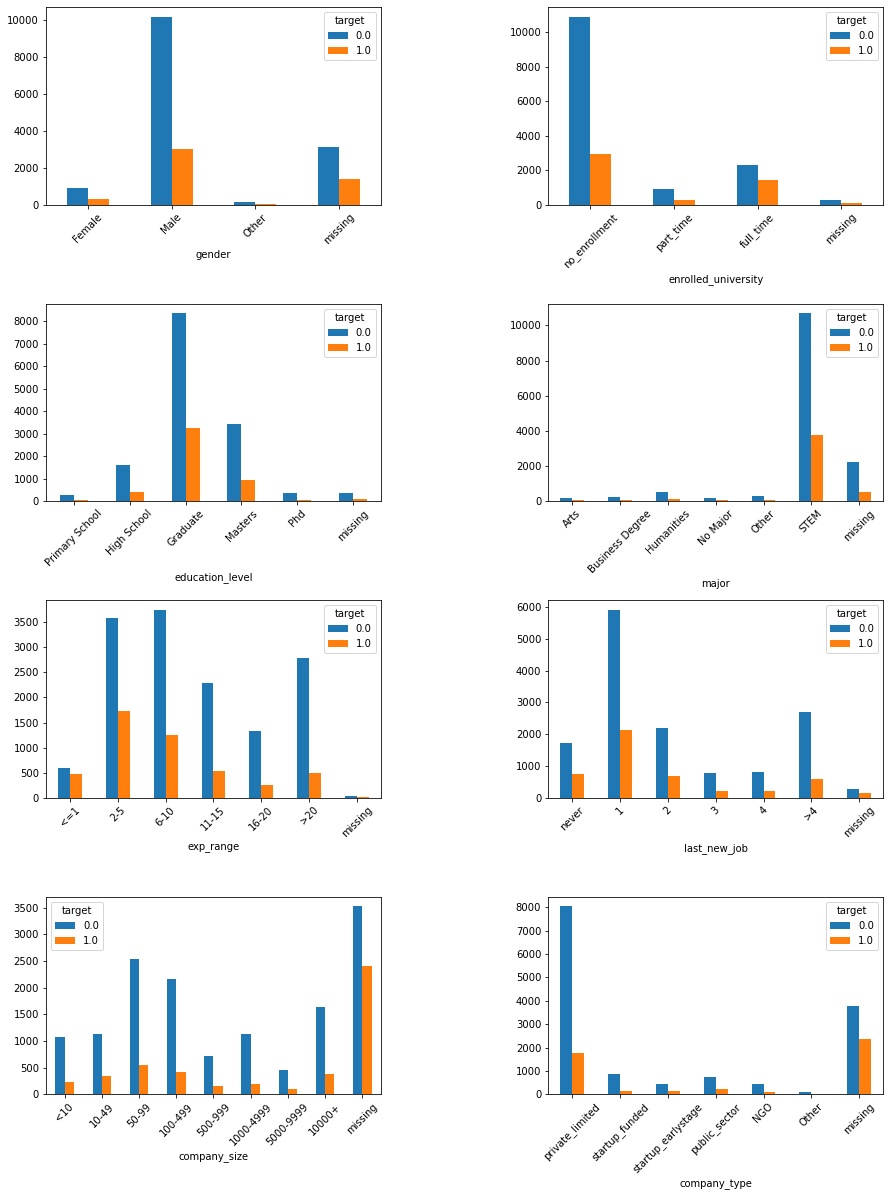

In [57]:
fig, axes = plt.subplots(4,2, figsize=(15,20))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

target_bar(axes[0,0], 'gender', 'target', df)
target_bar(axes[0,1], 'enrolled_university', 'target', df, reindex=enroll)
target_bar(axes[1,0], 'education_level', 'target', df, reindex=ed_level)
target_bar(axes[1,1], 'major', 'target', df)
target_bar(axes[2,0], 'exp_range', 'target', df, reindex=exp_lv)
target_bar(axes[2,1], 'last_new_job', 'target', df, reindex=last_job)
target_bar(axes[3,0], 'company_size', 'target', df, reindex=comp_sz)
target_bar(axes[3,1], 'company_type', 'target', df, reindex=job_type)

#### Based on the above barplots, people are more likely to be open to a job change if...
- They identify as female or other.
- They are currently enrolled in university (current student).
- They are not a STEM student.
- They have less work experience.
- They work in the public sector, for an NGO, or (to some degree) a startup.